# GroupBy Operations

## Understanding GroupBy objects

In [1]:
import pandas as pd

In [2]:
titanic=pd.read_csv("datasets/titanic.csv")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [4]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
886,0,2,male,27.0,0,0,13.00,S,NaN
887,1,1,female,19.0,0,0,30.00,S,B
888,0,3,female,NaN,1,2,23.45,S,NaN
889,1,1,male,26.0,0,0,30.00,C,C
890,0,3,male,32.0,0,0,7.75,Q,NaN


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
slice = titanic.iloc[:10,[2,3]]

In [7]:
slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [8]:
gbo = slice.groupby('sex')

In [9]:
type(gbo)

pandas.core.groupby.generic.DataFrameGroupBy

In [10]:
gbo.groups

{'female': [1, 2, 3, 8, 9], 'male': [0, 4, 5, 6, 7]}

In [11]:
l = list(gbo)

In [12]:
for i in l:
    print(type(i))

<class 'tuple'>
<class 'tuple'>


In [13]:
l[0]

('female',
       sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0)

In [14]:
l[1]

('male',
     sex   age
 0  male  22.0
 4  male  35.0
 5  male   NaN
 6  male  54.0
 7  male   2.0)

In [15]:
l[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [16]:
l[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [17]:
slice_female = slice[slice.sex == 'female']
slice_female

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [18]:
slice_male = slice[slice.sex == 'male']
slice_male

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [19]:
l[0][1].equals(slice_female)

True

In [20]:
for element in gbo:
    print(element[1])

      sex   age
1  female  38.0
2  female  26.0
3  female  35.0
8  female  27.0
9  female  14.0
    sex   age
0  male  22.0
4  male  35.0
5  male   NaN
6  male  54.0
7  male   2.0


## Splitting with many keys

In [21]:
summer = pd.read_csv("datasets/summer.csv")

In [22]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [23]:
summer.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [24]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [25]:
summer.Country.nunique()

147

In [26]:
split1 = summer.groupby('Country')

In [27]:
l = list(split1)

In [28]:
len(l)

147

In [29]:
l[100][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5031,1928,Amsterdam,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5741,1932,Los Angeles,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5889,1932,Los Angeles,Athletics,Athletics,"TORIBIO, Simeon Galvez",PHI,Men,High Jump,Bronze
5922,1932,Los Angeles,Boxing,Boxing,"VILLANUEVA, Jose",PHI,Men,50.8 - 54KG (Bantamweight),Bronze
6447,1936,Berlin,Athletics,Athletics,"WHITE, Miguel S.",PHI,Men,400M Hurdles,Bronze
11005,1964,Tokyo,Boxing,Boxing,"VILLANUEVA, Anthony N.",PHI,Men,54 - 57KG (Featherweight),Silver
18513,1988,Seoul,Boxing,Boxing,"SERANTES, Leopoldo",PHI,Men,- 48KG (Light-Flyweight),Bronze
20184,1992,Barcelona,Boxing,Boxing,"VELASCO, Roel",PHI,Men,- 48KG (Light-Flyweight),Bronze
21927,1996,Atlanta,Boxing,Boxing,"VELASCO, Mansueto",PHI,Men,- 48KG (Light-Flyweight),Silver


In [30]:
split2 = summer.groupby(['Country','Gender'])

In [31]:
l2 = list(split2)

In [32]:
len(l2)

236

In [33]:
l2[100][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
21081,1992,Barcelona,Shooting,Shooting,"PLETIKOSIC, Stevan",IOP,Men,50M Rifle Prone (60 Shots),Bronze


In [34]:
l2[101][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
21056,1992,Barcelona,Shooting,Shooting,"SEKARIC, Jasna",IOP,Women,10M Air Pistol (40 Shots),Silver
21060,1992,Barcelona,Shooting,Shooting,"BINDER, Aranka",IOP,Women,10M Air Rifle (40 Shots),Bronze


In [35]:
l2[104]

(('IRL', 'Women'),
        Year     City      Sport Discipline                Athlete Country  \
 21356  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21369  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21375  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21381  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 23627  2000   Sydney  Athletics  Athletics      O'SULLIVAN, Sonia     IRL   
 29896  2012   London     Boxing     Boxing          TAYLOR, Katie     IRL   
 
       Gender                   Event   Medal  
 21356  Women          200M Butterfly  Bronze  
 21369  Women  200M Individual Medley    Gold  
 21375  Women          400M Freestyle    Gold  
 21381  Women  400M Individual Medley    Gold  
 23627  Women                   5000M  Silver  
 29896  Women                   60 KG    Gold  )

In [36]:
l2[104][0]

('IRL', 'Women')

In [37]:
l2[104][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
21356,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Butterfly,Bronze
21369,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Individual Medley,Gold
21375,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Freestyle,Gold
21381,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Individual Medley,Gold
23627,2000,Sydney,Athletics,Athletics,"O'SULLIVAN, Sonia",IRL,Women,5000M,Silver
29896,2012,London,Boxing,Boxing,"TAYLOR, Katie",IRL,Women,60 KG,Gold


## split-apply-combine explained

In [38]:
slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [39]:
list(slice.groupby('sex'))[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [40]:
titanic.groupby("sex")[['fare','age']].max()  

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [41]:
new_df = titanic.groupby('sex').mean()
new_df

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

array([<AxesSubplot:title={'center':'survived'}, xlabel='sex'>,
       <AxesSubplot:title={'center':'pclass'}, xlabel='sex'>,
       <AxesSubplot:title={'center':'age'}, xlabel='sex'>,
       <AxesSubplot:title={'center':'sibsp'}, xlabel='sex'>,
       <AxesSubplot:title={'center':'parch'}, xlabel='sex'>,
       <AxesSubplot:title={'center':'fare'}, xlabel='sex'>], dtype=object)

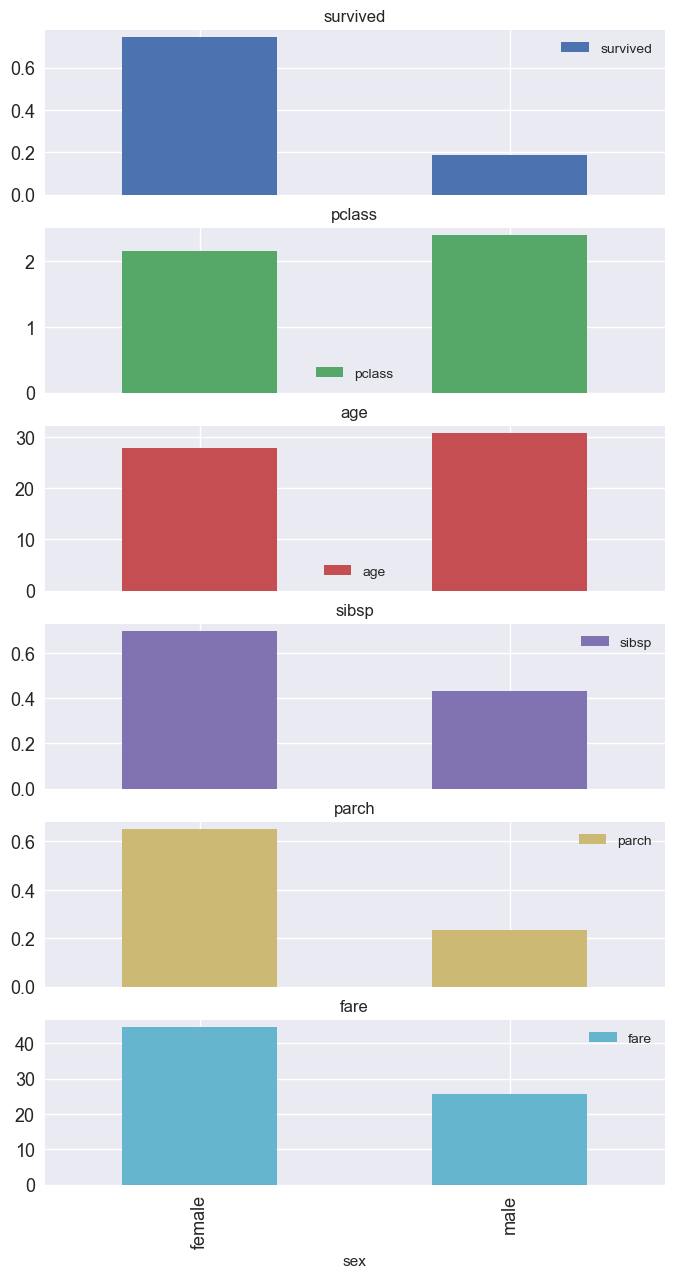

In [43]:
new_df.plot(kind='bar',subplots=True,figsize=(8,15),fontsize=13)

## split-apply-combine applied

In [44]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [45]:
medals_per_country = summer.groupby("Country").Medal.count()

In [46]:
m = medals_per_country.sort_values(ascending=False).head(20)
m = m.sort_values(ascending=True)
m

Country
DEN     507
POL     511
KOR     529
NOR     554
ROU     640
CAN     649
RUS     768
JPN     788
CHN     807
GDR     825
NED     851
SWE    1044
HUN    1079
AUS    1189
ITA    1296
GER    1305
FRA    1396
GBR    1720
URS    2049
USA    4585
Name: Medal, dtype: int64

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

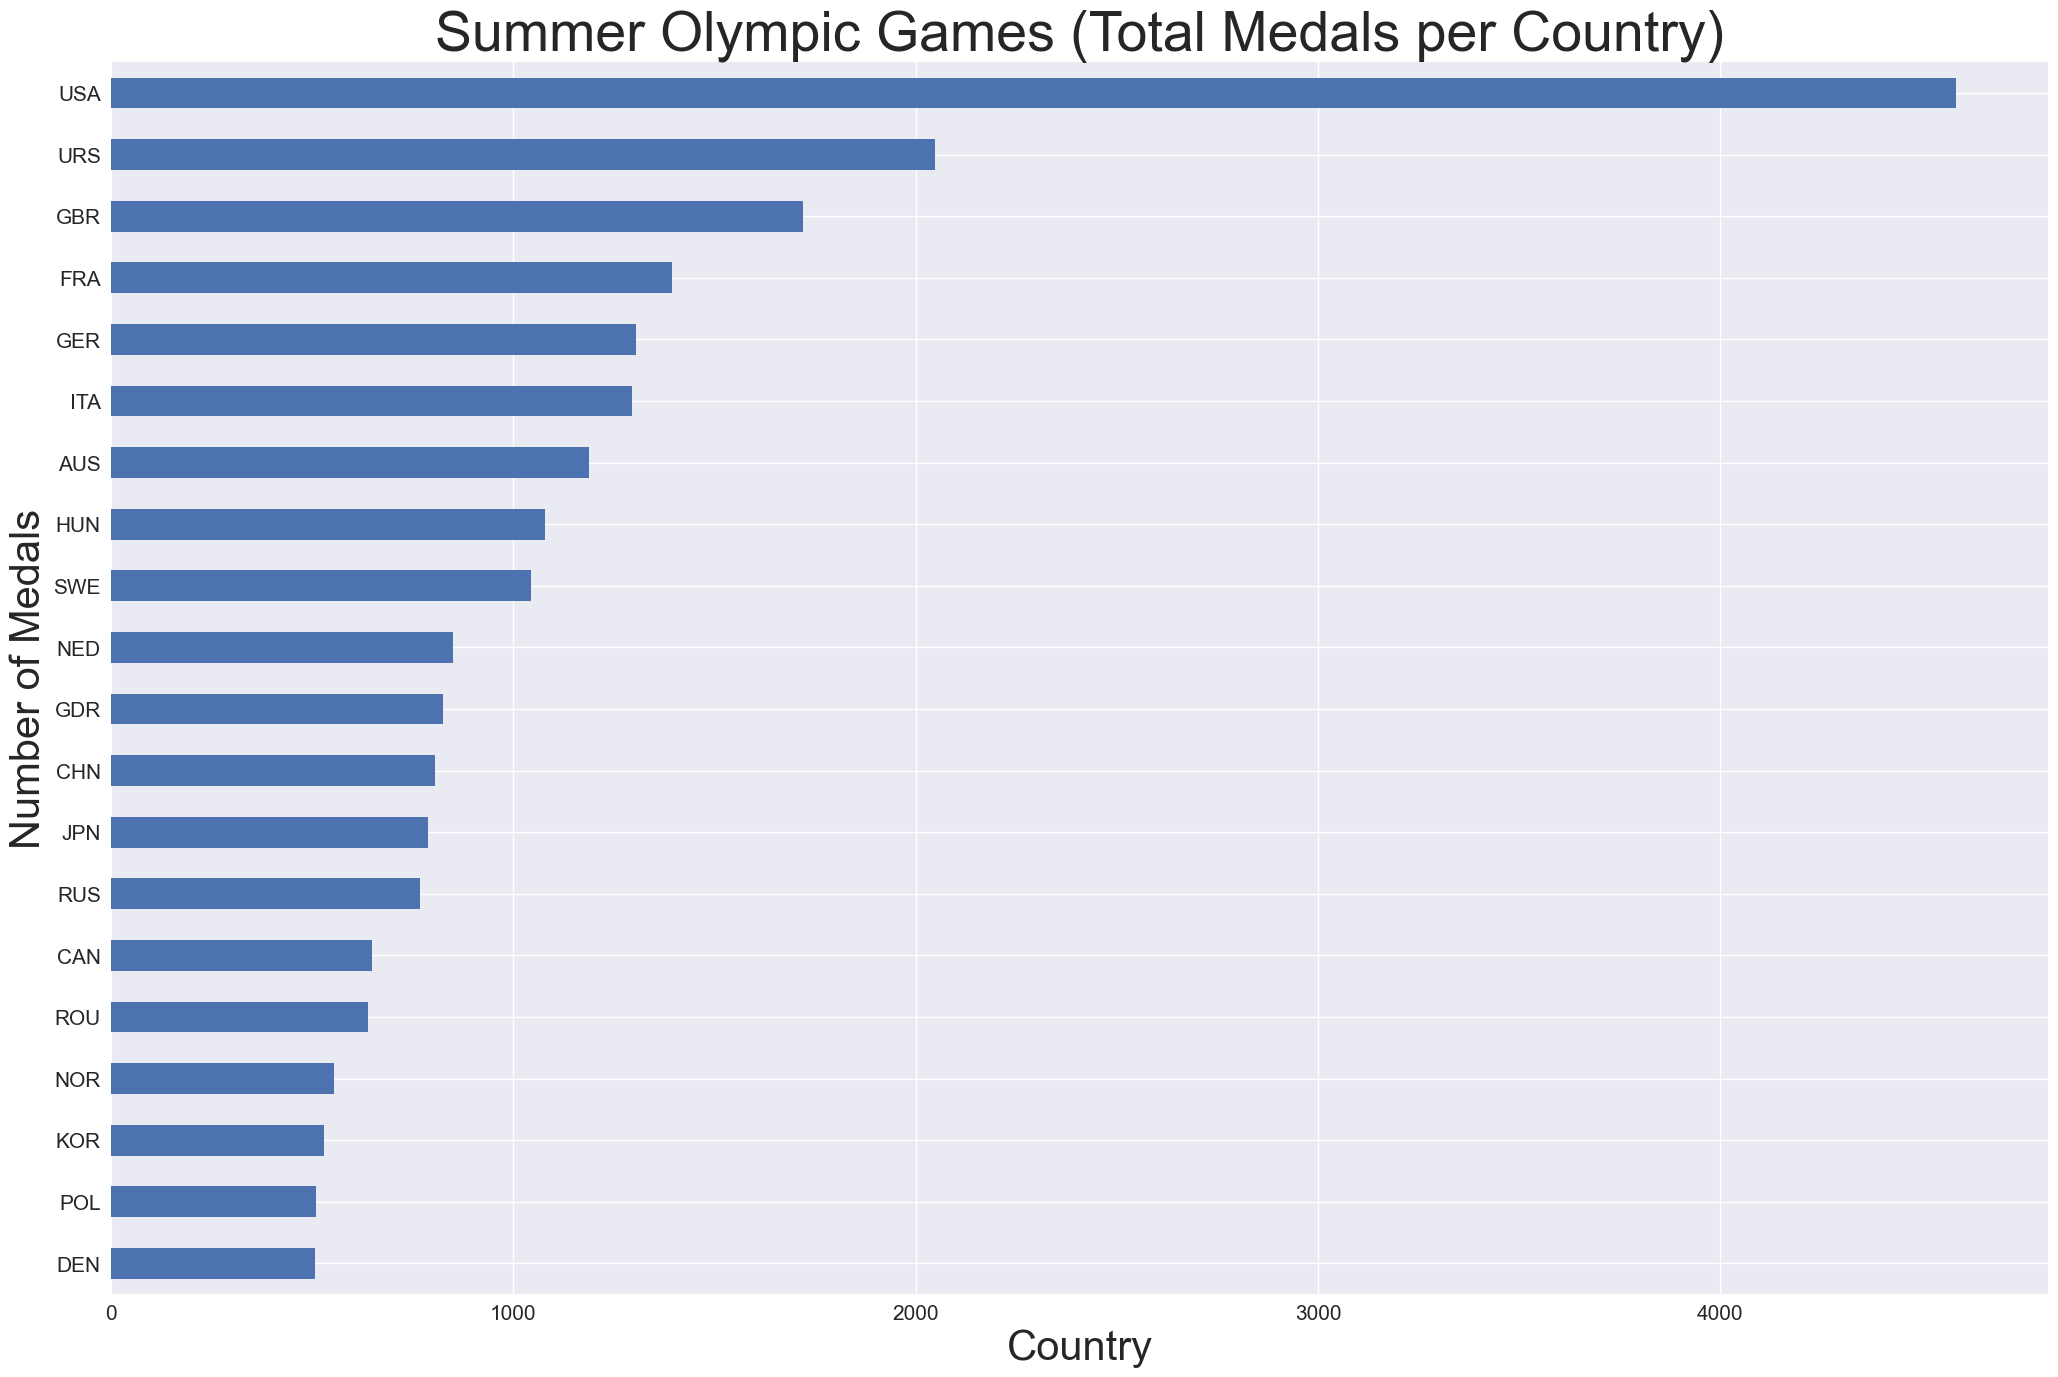

In [48]:
m.plot(kind='barh',figsize=(25,16),fontsize=15)
plt.xlabel('Country',fontsize=30)
plt.ylabel('Number of Medals',fontsize=30)
plt.title("Summer Olympic Games (Total Medals per Country)", fontsize=40)
plt.show()

In [49]:
titanic.groupby('pclass').mean()

,survived,age,sibsp,parch,fare
pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [50]:
titanic.survived.sum()

342

In [51]:
titanic.survived.mean()*100

38.38383838383838

In [52]:
titanic.groupby("sex").survived.mean()*100

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

In [53]:
titanic.groupby("sibsp").survived.mean()*100

sibsp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: survived, dtype: float64

In [54]:
titanic.groupby("pclass").survived.mean()*100

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64

In [55]:
titanic['ad_chi'] = 'adult'

In [56]:
titanic.loc[titanic.age < 18,'ad_chi'] = 'child'

In [57]:
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
708,1,1,female,22.0,0,0,151.550,S,NaN,adult
215,1,1,female,31.0,1,0,113.275,C,D,adult
649,1,3,female,23.0,0,0,7.550,S,NaN,adult
828,1,3,male,NaN,0,0,7.750,Q,NaN,adult
314,0,2,male,43.0,1,1,26.250,S,NaN,adult


In [58]:
titanic.ad_chi.value_counts()

adult    778
child    113
Name: ad_chi, dtype: int64

In [59]:
titanic.groupby('ad_chi').survived.mean()*100

ad_chi
adult    36.118252
child    53.982301
Name: survived, dtype: float64

In [60]:
titanic.groupby(['pclass','ad_chi']).survived.mean()*100

pclass  ad_chi
1       adult     61.274510
        child     91.666667
2       adult     40.993789
        child     91.304348
3       adult     21.791768
        child     37.179487
Name: survived, dtype: float64

In [61]:
titanic.groupby(['sex','ad_chi']).survived.count()

sex     ad_chi
female  adult     259
        child      55
male    adult     519
        child      58
Name: survived, dtype: int64

In [62]:
w_c_first = titanic.groupby(['sex','ad_chi']).survived.mean().sort_values(ascending=True)

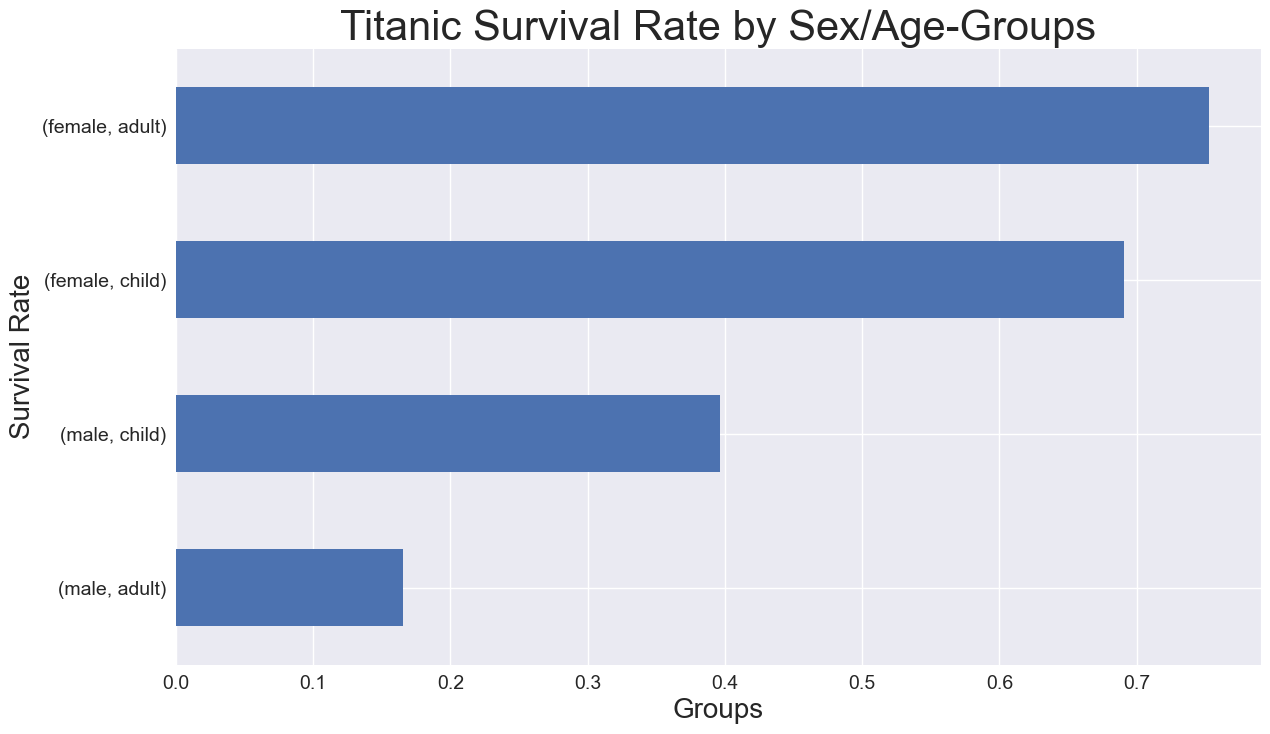

In [63]:
w_c_first.plot(kind='barh',figsize=(14,8),fontsize=14)
plt.xlabel('Groups',fontsize=20)
plt.ylabel("Survival Rate",fontsize=20)
plt.title("Titanic Survival Rate by Sex/Age-Groups",fontsize=30)
plt.show()

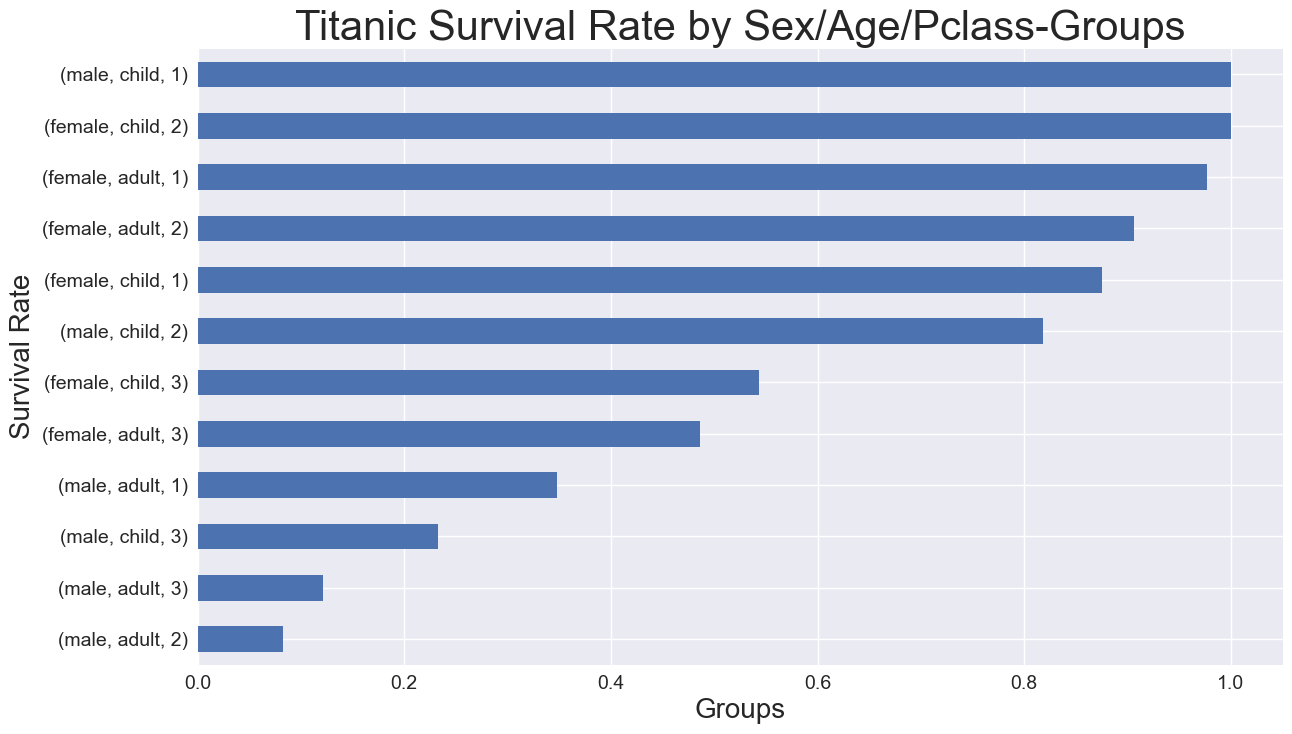

In [64]:
w_p_c_first = titanic.groupby(['sex','ad_chi','pclass']).survived.mean().sort_values()
w_p_c_first.plot(kind='barh',figsize=(14,8),fontsize=14)
plt.xlabel('Groups',fontsize=20)
plt.ylabel("Survival Rate",fontsize=20)
plt.title("Titanic Survival Rate by Sex/Age/Pclass-Groups",fontsize=30)
plt.show()

In [65]:
w_c_first

sex     ad_chi
male    adult     0.165703
        child     0.396552
female  child     0.690909
        adult     0.752896
Name: survived, dtype: float64

In [66]:
summer.groupby(['Year','Medal']).Medal.count()

Year  Medal 
1896  Bronze     40
      Gold       64
      Silver     47
1900  Bronze    142
      Gold      178
               ... 
2008  Gold      669
      Silver    663
2012  Bronze    680
      Gold      636
      Silver    633
Name: Medal, Length: 81, dtype: int64

## Advanced Aggregation with agg()

In [67]:
titanic = pd.read_csv('datasets/titanic.csv',
                     usecols=['survived','pclass','sex','age','fare'])

In [68]:
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [69]:
titanic.groupby("sex").mean()

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [70]:
titanic.groupby("sex").sum()

,survived,pclass,age,fare
sex,,,,
female,233,678,7286.00,13966.6628
male,109,1379,13919.17,14727.2865


In [71]:
total = titanic.groupby('sex').agg(['mean','sum','count','max','min'])

In [72]:
for column in titanic.columns:
    if column != 'sex':
        print(column)
        print(total[column])
        print('-----------')

survived
            mean  sum  count  max  min
sex                                   
female  0.742038  233    314    1    0
male    0.188908  109    577    1    0
-----------
pclass
            mean   sum  count  max  min
sex                                    
female  2.159236   678    314    3    1
male    2.389948  1379    577    3    1
-----------
age
             mean       sum  count   max   min
sex                                           
female  27.915709   7286.00    261  63.0  0.75
male    30.726645  13919.17    453  80.0  0.42
-----------
fare
             mean         sum  count       max   min
sex                                                 
female  44.479818  13966.6628    314  512.3292  6.75
male    25.523893  14727.2865    577  512.3292  0.00
-----------


In [73]:
titanic.groupby('sex').agg({'survived':['sum','mean'],
                           'pclass':"mean",
                           'age':['mean','median'],
                           'fare':"max"})

survived              pclass        age             fare
            sum      mean      mean       mean median       max
sex                                                            
female      233  0.742038  2.159236  27.915709   27.0  512.3292
male        109  0.188908  2.389948  30.726645   29.0  512.3292

In [74]:
titanic.groupby('sex').agg(survived_total=('survived','sum'),
                          survival_rate=('survived','mean'),
                          mean_age=('age','mean'),
                          max_ticket_rate=('fare','max'))

,survived_total,survival_rate,mean_age,max_ticket_rate
sex,,,,
female,233,0.742038,27.915709,512.3292
male,109,0.188908,30.726645,512.3292


## Transformation with transform()

In [75]:
titanic.groupby(['sex','pclass']).survived.mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [76]:
titanic['group_survival_rate'] = titanic.groupby(['sex','pclass']).survived.transform('mean')

In [77]:
titanic.head()

,survived,pclass,sex,age,fare,group_survival_rate
0,0,3,male,22.0,7.2500,0.135447
1,1,1,female,38.0,71.2833,0.968085
2,1,3,female,26.0,7.9250,0.500000
3,1,1,female,35.0,53.1000,0.968085
4,0,3,male,35.0,8.0500,0.135447


In [78]:
titanic['outliers']=abs(titanic.survived - titanic.group_survival_rate)

In [79]:
titanic

,survived,pclass,sex,age,fare,group_survival_rate,outliers
0,0,3,male,22.0,7.2500,0.135447,0.135447
1,1,1,female,38.0,71.2833,0.968085,0.031915
2,1,3,female,26.0,7.9250,0.500000,0.500000
3,1,1,female,35.0,53.1000,0.968085,0.031915
4,0,3,male,35.0,8.0500,0.135447,0.135447
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0.157407,0.157407
887,1,1,female,19.0,30.0000,0.968085,0.031915
888,0,3,female,NaN,23.4500,0.500000,0.500000
889,1,1,male,26.0,30.0000,0.368852,0.631148


In [80]:
titanic[titanic.outliers > 0.85].head()

,survived,pclass,sex,age,fare,group_survival_rate,outliers
36,1,3,male,NaN,7.2292,0.135447,0.864553
41,0,2,female,27.0,21.0000,0.921053,0.921053
65,1,3,male,NaN,15.2458,0.135447,0.864553
74,1,3,male,32.0,56.4958,0.135447,0.864553
81,1,3,male,29.0,9.5000,0.135447,0.864553


## Replacing NA Values by group-specific values

In [81]:
titanic = pd.read_csv('datasets/titanic.csv')

In [82]:
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
631,0,3,male,51.0,0,0,7.0542,S,NaN
629,0,3,male,NaN,0,0,7.7333,Q,NaN
234,0,2,male,24.0,0,0,10.5000,S,NaN
488,0,3,male,30.0,0,0,8.0500,S,NaN
41,0,2,female,27.0,1,0,21.0000,S,NaN


In [83]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [84]:
mean_age = titanic.age.mean()

In [85]:
titanic.age.fillna(mean_age)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [86]:
titanic.groupby(['sex','pclass']).age.mean()

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [87]:
titanic['group_mean_age'] = round(titanic.groupby(['sex','pclass']).age.transform('mean'),1)

In [88]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.0,1,0,7.2500,S,NaN,26.5
1,1,1,female,38.0,1,0,71.2833,C,C,34.6
2,1,3,female,26.0,0,0,7.9250,S,NaN,21.8
3,1,1,female,35.0,1,0,53.1000,S,C,34.6
4,0,3,male,35.0,0,0,8.0500,S,NaN,26.5
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,30.7
887,1,1,female,19.0,0,0,30.0000,S,B,34.6
888,0,3,female,NaN,1,2,23.4500,S,NaN,21.8
889,1,1,male,26.0,0,0,30.0000,C,C,41.3


In [89]:
titanic.age.fillna(titanic.group_mean_age, inplace=True)

In [90]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.0,1,0,7.2500,S,NaN,26.5
1,1,1,female,38.0,1,0,71.2833,C,C,34.6
2,1,3,female,26.0,0,0,7.9250,S,NaN,21.8
3,1,1,female,35.0,1,0,53.1000,S,C,34.6
4,0,3,male,35.0,0,0,8.0500,S,NaN,26.5
5,0,3,male,26.5,0,0,8.4583,Q,NaN,26.5
6,0,1,male,54.0,0,0,51.8625,S,E,41.3
7,0,3,male,2.0,3,1,21.0750,S,NaN,26.5
8,1,3,female,27.0,0,2,11.1333,S,NaN,21.8
9,1,2,female,14.0,1,0,30.0708,C,NaN,28.7


In [91]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   survived        891 non-null    int64  
 1   pclass          891 non-null    int64  
 2   sex             891 non-null    object 
 3   age             891 non-null    float64
 4   sibsp           891 non-null    int64  
 5   parch           891 non-null    int64  
 6   fare            891 non-null    float64
 7   embarked        889 non-null    object 
 8   deck            203 non-null    object 
 9   group_mean_age  891 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 69.7+ KB


## Generalizing split-apply-transform with apply()

In [92]:
titanic = titanic[['survived','pclass','sex','age','fare']]

In [93]:
titanic.groupby('sex').mean()

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.294268,44.479818
male,0.188908,2.389948,30.422478,25.523893


In [94]:
female_group = list(titanic.groupby('sex'))[0][1]

In [95]:
titanic[titanic.sex == 'female'].equals(female_group)

True

In [96]:
# titanic[titanic.sex == 'female']

In [97]:
female_group.mean()

C:\Users\vamsh\AppData\Local\Temp\ipykernel_11560\92614746.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  female_group.mean()


survived     0.742038
pclass       2.159236
age         27.294268
fare        44.479818
dtype: float64

In [98]:
def group_mean(group):
    return group.mean()

In [99]:
group_mean(female_group)

C:\Users\vamsh\AppData\Local\Temp\ipykernel_11560\359042690.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return group.mean()


survived     0.742038
pclass       2.159236
age         27.294268
fare        44.479818
dtype: float64

In [100]:
titanic.groupby('sex').apply(group_mean)

C:\Users\vamsh\AppData\Local\Temp\ipykernel_11560\359042690.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return group.mean()


,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.294268,44.479818
male,0.188908,2.389948,30.422478,25.523893


In [101]:
titanic.nlargest(5,'age')

,survived,pclass,sex,age,fare
630,1,1,male,80.0,30.0000
851,0,3,male,74.0,7.7750
96,0,1,male,71.0,34.6542
493,0,1,male,71.0,49.5042
116,0,3,male,70.5,7.7500


In [102]:
def five_oldest_survived(group):
    return group[group.survived == 1].nlargest(5,'age')

In [103]:
titanic.groupby('sex').apply(five_oldest_survived)

survived  pclass     sex   age     fare
sex                                                
female 275         1       1  female  63.0  77.9583
       483         1       3  female  63.0   9.5875
       829         1       1  female  62.0  80.0000
       366         1       1  female  60.0  75.2500
       11          1       1  female  58.0  26.5500
male   630         1       1    male  80.0  30.0000
       570         1       2    male  62.0  10.5000
       587         1       1    male  60.0  79.2000
       647         1       1    male  56.0  35.5000
       449         1       1    male  52.0  30.5000

## Hierarchical Indexing (MultiIndex) with Groupby

In [104]:
titanic

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,21.8,23.4500
889,1,1,male,26.0,30.0000


In [105]:
summary = titanic.groupby(['sex','pclass']).mean()

In [106]:
summary

survived        age        fare
sex    pclass                                 
female 1       0.968085  34.610638  106.125798
       2       0.921053  28.722368   21.970121
       3       0.500000  21.764583   16.118810
male   1       0.368852  41.284590   67.226127
       2       0.157407  30.737315   19.741782
       3       0.135447  26.505533   12.661633

In [107]:
summary.index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['sex', 'pclass'])

In [108]:
summary.loc[('female', 3),:]

survived     0.500000
age         21.764583
fare        16.118810
Name: (female, 3), dtype: float64

In [109]:
summary.swaplevel()

,,survived,age,fare
pclass,sex,,,
1,female,0.968085,34.610638,106.125798
2,female,0.921053,28.722368,21.970121
3,female,0.500000,21.764583,16.118810
1,male,0.368852,41.284590,67.226127
2,male,0.157407,30.737315,19.741782
3,male,0.135447,26.505533,12.661633


In [110]:
summary.swaplevel().sort_index()

survived        age        fare
pclass sex                                    
1      female  0.968085  34.610638  106.125798
       male    0.368852  41.284590   67.226127
2      female  0.921053  28.722368   21.970121
       male    0.157407  30.737315   19.741782
3      female  0.500000  21.764583   16.118810
       male    0.135447  26.505533   12.661633

In [111]:
summary.reset_index()

,sex,pclass,survived,age,fare
0,female,1,0.968085,34.610638,106.125798
1,female,2,0.921053,28.722368,21.970121
2,female,3,0.500000,21.764583,16.118810
3,male,1,0.368852,41.284590,67.226127
4,male,2,0.157407,30.737315,19.741782
5,male,3,0.135447,26.505533,12.661633


## Stack() and Unstack()

In [112]:
medals_by_country = summer.groupby(['Country','Medal']).Medal.count()

In [113]:
medals_by_country

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Gold      18
         Silver     4
ZZX      Bronze    10
         Gold      23
         Silver    15
Name: Medal, Length: 347, dtype: int64

In [114]:
medals_by_country.loc[('USA','Gold')]

2235

In [115]:
medals_by_country.shape

(347,)

In [116]:
medals_by_country.unstack(level=-1)

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,NaN,NaN,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,NaN,1.0


In [117]:
medals_by_country.unstack(level=-2)

Country,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Medal,,,,,,,,,,,,,,,,,,,,,
Bronze,2.0,NaN,8.0,5.0,91.0,8.0,472.0,44.0,15.0,5.0,...,584.0,30.0,1098.0,10.0,8.0,NaN,118.0,1.0,1.0,10.0
Gold,NaN,NaN,5.0,20.0,69.0,1.0,312.0,21.0,6.0,13.0,...,838.0,44.0,2235.0,5.0,2.0,NaN,143.0,NaN,18.0,23.0
Silver,NaN,1.0,2.0,4.0,99.0,2.0,405.0,81.0,5.0,9.0,...,627.0,2.0,1252.0,5.0,2.0,2.0,174.0,1.0,4.0,15.0


In [118]:
medals_by_country = medals_by_country.unstack(level=-1, fill_value=0)

In [120]:
medals_by_country.head()

Medal,Bronze,Gold,Silver
Country,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,2
ANZ,5,20,4
ARG,91,69,99


In [121]:
medals_by_country.shape

(147, 3)

In [123]:
medals_by_country = medals_by_country[['Gold','Silver','Bronze']]

In [127]:
medals_by_country.head(10)

Medal,Gold,Silver,Bronze
Country,,,
AFG,0,0,2
AHO,0,1,0
ALG,5,2,8
ANZ,20,4,5
ARG,69,99,91
ARM,1,2,8
AUS,312,405,472
AUT,21,81,44
AZE,6,5,15


In [138]:
medals_by_country.sort_values(by=['Gold','Silver','Bronze'],ascending=[False,False,False],inplace=True)

In [139]:
medals_by_country.head(10)

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
HUN,412,316,351
FRA,408,491,497
SWE,349,367,328
GDR,329,271,225


In [126]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

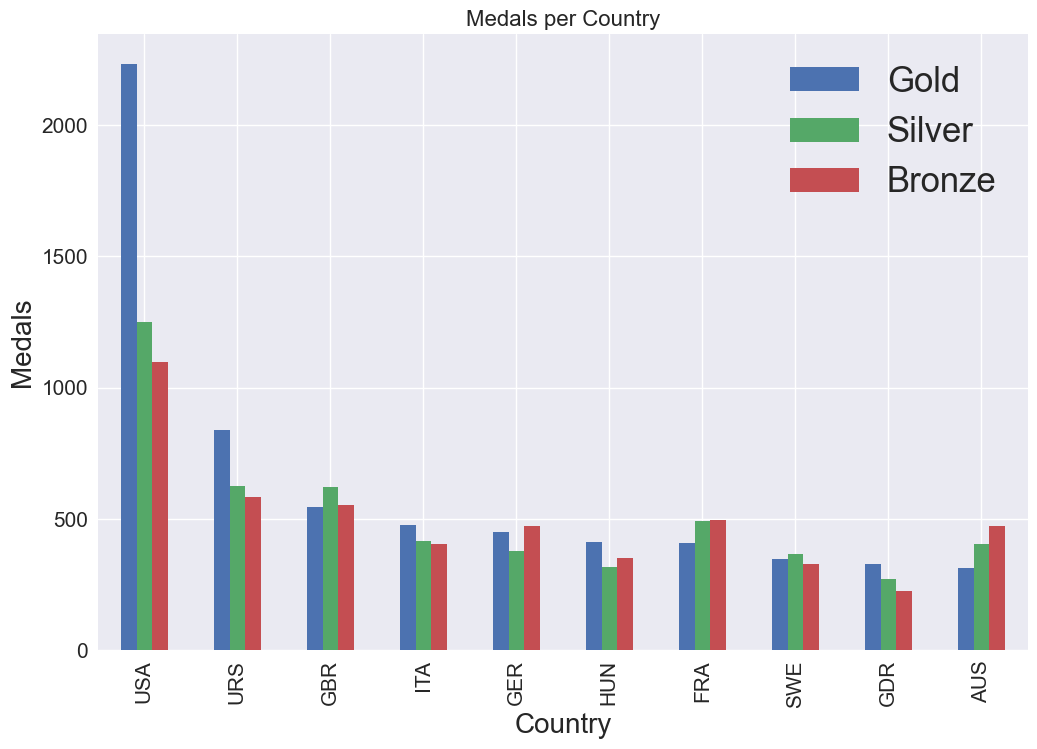

In [157]:
medals_by_country.head(10).plot(kind='bar',figsize=(12,8),fontsize=15)
plt.xlabel('Country',fontsize=20)
plt.ylabel('Medals',fontsize=20)
plt.title('Medals per Country',fontsize=16)
plt.legend(fontsize=25)
plt.show()

In [158]:
summary = titanic.groupby(["pclass", "sex"]).age.mean().unstack()

In [159]:
summary

sex,female,male
pclass,,
1,34.610638,41.284590
2,28.722368,30.737315
3,21.764583,26.505533


In [160]:
titanic.groupby(["pclass", "sex"]).age.mean()

pclass  sex   
1       female    34.610638
        male      41.284590
2       female    28.722368
        male      30.737315
3       female    21.764583
        male      26.505533
Name: age, dtype: float64

In [162]:
summary.columns

Index(['female', 'male'], dtype='object', name='sex')